# Support Vector Regression (SVR)

## Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [8]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [9]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [10]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [11]:
y = y.reshape(len(y),1)

In [12]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler() # use different objects as mean and variance are different for X, y
y_sc = StandardScaler()
X = x_sc.fit_transform(X)
y = y_sc.fit_transform(y)

In [18]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [19]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [21]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/Volumes/Crucial 1TB/Machine Learning A-Z/ml-study/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [22]:
y_sc.inverse_transform( regressor.predict( x_sc.transform( [[6.5]] ) ).reshape(1,-1) )

array([[170370.0204065]])

## Visualising the SVR results

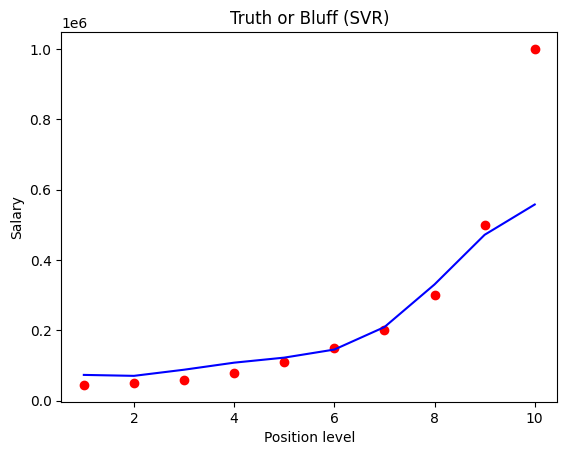

In [28]:
plt.scatter(x_sc.inverse_transform(X), y_sc.inverse_transform(y), color = 'red')
plt.plot(x_sc.inverse_transform(X), y_sc.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

/var/folders/gp/hwkrygxd6xxd8gp9wnzkj2d80000gn/T/ipykernel_20364/796716520.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x_sc.inverse_transform(X)), max(x_sc.inverse_transform(X)), 0.1)


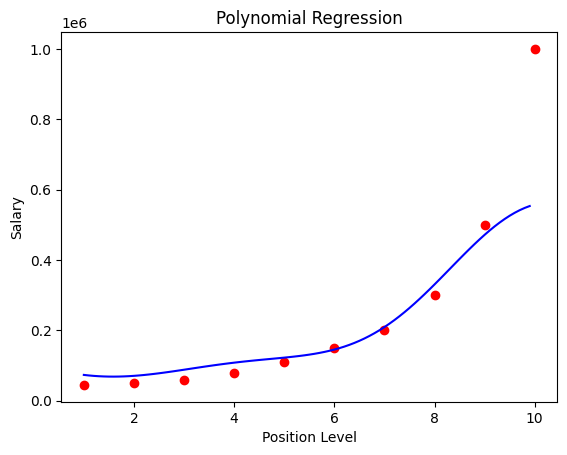

In [29]:
X_grid = np.arange(min(x_sc.inverse_transform(X)), max(x_sc.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(x_sc.inverse_transform(X), y_sc.inverse_transform(y), color='red')
plt.plot(X_grid, y_sc.inverse_transform(regressor.predict(x_sc.transform(X_grid)).reshape(-1,1)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()